# CO31 - Laplace's Equation
Calum Holker

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

## Solve Laplace's Equatation
Solves Laplace's equation using the over-relaxation method

Input:

        init_psi - 2D matrix containing the initial \psi, including boundaries

        alpha - the coefficient of relaxation

        N_iter - maximum number of iterations performed

Output:
        
        psi - 2D matrix of the value of \psi after (up to) N_iter iterations

        hist_values - (N_iter x 3) matrix that contains historical values of 3 points during the iteration
                      1 in upper half, 1 in middle, 1 in lower half

Constraints:

        The boundaries of \psi are kept constant during the iterations

In [103]:
def solve_laplace (init_psi, alpha, N_iter):
    psi = init_psi
    hist_values = [[init_psi[1,5]],[init_psi[3,3]],[init_psi[5,1]]]
    while N_iter > 0:
        sum_squares = 0
        for i in range(1,6):
            for j in range(1,6):
                Rm = psi[i,j+1] + psi[i+1,j] + psi[i-1,j] + psi[i,j-1] - (4*psi[i,j])
                sum_squares = sum_squares + (Rm ** 2)
                psi[i,j] = psi[i,j] + ((alpha * Rm)/4)
                if (i == 1) and (j == 5):
                    hist_values[0].append(psi[1,5])
                if (i == 3) and (j == 3):
                    hist_values[1].append(psi[3,3])
                if (i == 5) and (j == 1):
                    hist_values[2].append(psi[5,1])
        N_iter = N_iter - 1
        if sum_squares < 0.001:
            break
    return psi, hist_values

In [111]:
def get_init_psi(n):
    init_psi = np.zeros((n, n))
    d = 1/(n-1)
    for i in range(n):
        init_psi[0,i] = np.sin(i*d)*np.sinh(1)
        init_psi[i,n-1] = np.sin(1)*np.sinh((6-i)*d)
    return init_psi

In [112]:
alpha = 1.35
N_iter = 30
init_psi = get_init_psi(7)

psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

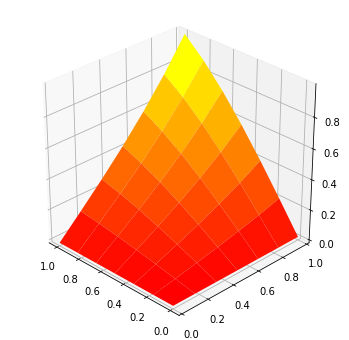

In [113]:
x = np.linspace(0,1,7)
y = np.linspace(1,0,7)
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, psi, cmap=cm.autumn)
ax.set_ylim(1,0)
ax.view_init(30, 135)

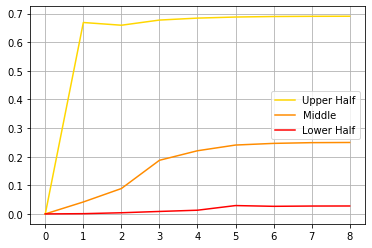

In [114]:
t = np.arange(0,len(hist_values[1]),1)
plt.plot(t, hist_values[0], label='Upper Half', color='gold')
plt.plot(t, hist_values[1], label='Middle', color='darkorange')
plt.plot(t, hist_values[2], label = 'Lower Half', color='red')
plt.xticks(t)
plt.grid()
plt.legend()

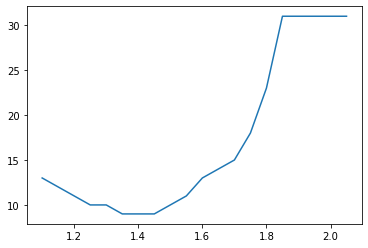

In [119]:
N_iter = 30
alphas = np.arange(1.1,2.1,0.05)
convergence = []
for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)
    convergence.append(len(hist_values[0]))

plt.plot(alphas,convergence)